In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
%matplotlib widget

# Partial Differential Equations
<div align="center">
Uwe Jaekel <br>    
University of Applied Sciences Koblenz <br>
<br>
    <a href="mailto:jaekel@hs-koblenz.de">jaekel@hs-koblenz.de</a>
</div>

## What are partial differential equations?
Differential equations that contain derivatives with respect to more than one independent variable.

E.g. for $u = u(x,y,z)$:

$$u_{x} + sin(u) u_{xy} = x+yz.$$

Notation:
$$ u_x := \frac{\partial u}{\partial x},\qquad u_{xy} := \frac{\partial}{\partial y}\frac{\partial u}{\partial x} = \frac{\partial}{\partial x}\frac{\partial u}{\partial y}.$$

**For uniqueness of the solution, we need additional boundary and/or initial conditions.**

## Where do we find them?


  - Electrostatics, Electrodynamics (Maxwell's equations)
  - Propagation of sound and light (Wave equation)
  - Diffusion, Heat propagation (Diffusion equation)
  - Fluid dynamics (Navier-Stokes equations) https://www.claymath.org
  - General relativity (Einstein's field equation)
  - Quantum mechanics (Schrödinger equation)
  - Financial engineering (Black-Scholes equation)
  - Structural analysis

## Motivation: Continuity equation
- 1 spatial dimension for simplicity
- $u = u(t,x)$: concentration of a substance at position $x$ at time $t$
- $j(t,x)$: mass per unit time that traverses position $x$ at time $t$
- $j>0$: flow to the right, $j<0$: flow to the left.


### Derivation
Consider mass $M$ in a small interval $[x, x+\Delta x]$:
\begin{align*}
 M &\approx u(t,x)\Delta x\\
 \frac{\partial M}{\partial t} &\approx u_t\Delta x.
\end{align*}
On the other hand, all mass entering or leaving the interval must traverse the left or right boundary:
$$ \frac{\partial M}{\partial t} = -j(t, x+\Delta x) + j(t, x).$$
Hence
$$ u_t = \lim_{\Delta x\to 0} -\frac{j(t, x+\Delta x) - j(t, x)}{\Delta x} = -j_x.$$

This is called the (1D) _continuity equation_:
$$\frac{\partial u}{\partial t} + \frac{\partial j}{\partial x} = 0.$$
Involving 2 functions -- we need a relation between $u$ and $j$.

## Three PDEs derived from the continuity equation
1.  Simple proporionality: $j = a u$. The constant $a$ can be interpreted as a velocity:
$$ u_t + a u_x = 0.$$
2. Fick's law of diffusion: $j = - D u_x$, with diffusion coefficient $D$. Diffusion tries to level concentration gradients:
$$ u_t = D u_{xx}.$$
3. $j = u^2/2$. This leads to the _inviscid Burgers equation_:
$$ u_t + u u_x = 0.$$
The (full) Burgers equation is a toy model for the nonlinearities in the Navier-Stokes equations governing fluid flow.

## The method of characteristics
Example: $u_t + a u_x = 0$, where $a$ is a constant transport velocity.

Initial (or "boundary") condition for $t=0$:
$$ u(0,x) := f(x),$$
with a given function $f$.

Idea: Let $(\tau, \xi(\tau))$ a contour line of $u$ that runs through $(t,x)$, i.e., a curve in along which $u$ is constant and with $\xi(t) = x$.

Hence:
\begin{align*}
    \frac{d}{d\tau}u(\tau,\xi(\tau)) &= u_t(\tau,\xi) + u_x(\tau,\xi)\frac{d\xi}{d\tau} = 0.
\end{align*}
However, we also have $u_t + a u_x = 0$ everywhere. Comparing the coefficients, we find:
$$ \frac{d\xi}{d\tau} = a,$$
hence
$$\xi(\tau) = a\tau + C,$$
where $C$ is a constant.

Now we want this so-called characteristic to run through $(t,x)$. Hence for $t=\tau$, we find
$$a t + C = x \qquad\Rightarrow\qquad C = x - at.$$

On the other hand, the characteristic reaches the boundary ($t=0$) for $\tau=0$, hence at
$$x' = \xi(0) = C  = x - at.$$
Since $u$ is constant on the characteristic, we find
$$ u(t, x) = u(0, x') = f(x') = f(x-at).$$

**Exercise** Check this!

### Can Python do this?
We can find the same result with `sympy`:

In [3]:
from sympy import Function, Eq, symbols
from sympy.solvers.pde import pdsolve
# from sympy.abc import x, y
x, t = symbols("x t")

u = Function("u")(t, x)
u_t = u.diff(t)
u_x = u.diff(x)
eq = Eq(u_t + x*u_x, 0)
pdsolve(eq)

Eq(u(t, x), F(x*exp(-t)))

**Exercise** Solve the PDE for $u(t,x)$, $t\ge 0$, $x\in\mathbb R$,
$$ u_t + x u_x = 0$$
under the initial condition
$$u(0, x) = f(x)$$
with the method of characteristics (manually and/or using sympy). Check the result.

**Solution:**

In [3]:
from sympy import Function, Eq, symbols
from sympy.solvers.pde import pdsolve
# from sympy.abc import x, y
x, t = symbols("x t")

u = Function("u")(t, x)
u_t = u.diff(t)
u_x = u.diff(x)
eq = Eq(u_t + x*u_x, 0)
pdsolve(eq)

Eq(u(t, x), F(x*exp(-t)))

## Finite differences
$$\lim_{\Delta x\to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} = \frac{df(x)}{dx} = f'(x).$$
What is the error?

Taylor expansion of a function $f$ of one variable. Assume that $f$ is continuously differentiable twice.

\begin{align*}
f(x+\Delta x) &= f(x) + f'(x)\Delta x + \frac{1}{2} f''(\xi) (\Delta x)^2\\
&= f(x) + f'(x)\Delta x + O(\Delta x^2)
\end{align*}
where $x \le \xi \le x + \Delta x$.

Rearranging:
$$ f'(x) = \frac{f(x + \Delta x) - f(x)}{\Delta x} + \frac{O((\Delta x)^2)}{\Delta x} 
    = \frac{f(x + \Delta x) - f(x)}{\Delta x} + O(\Delta x) $$

### Exercises
1. Show that the "centered finite difference" gives a second order approximation, provided $f$ can be differentiated three times:
$$ f'(x) = \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x}  + O((\Delta x)^2). $$
Why is a higher order better?

2. Show that the second derivative $f''(x)$ can be approximated to second order as
$$ f''(x) = \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x)}{(\Delta x)^2} + O((\Delta x)^2),$$

## Finite difference solution of a PDE
Solve $u_t + a u_x = 0$, with $a>0$ on a finite interval $[0, L]$ with initial condition
$$u(0,x) = f(x)$$
and periodic boundary condition $u(t, 0) = u(t, L)$.

Discretization on equidistant grid: $x_0 = 0, x_1 = \Delta x, \dots, x_N = N\Delta x,$ where $\Delta x = L/N$.

$$ u^k_n = u(k\Delta t, n\Delta x),$$
and approximate derivatives by finite difference quotients:

\begin{align*}
    \frac{\partial}{\partial t} u^k_n &= \frac{u^{k+1}_{n} - u^k_n}{\Delta t} + O(\Delta t)\\
    \frac{\partial}{\partial x} u^k_n &= \frac{u^{k}_{n} - u^k_{n-1}}{\Delta x} + O(\Delta x)
\end{align*}

Using these approximations in the PDE, and solving for $u^{n+1}_k$ leads to the recursion
$$ u^{k+1}_n = u^k_n - \sigma (u^k_n - u^k_{n-1} )$$ 
where $\sigma = a\Delta t/\Delta x$.

In [4]:
N = 200
L = 30.0
dx = L/N
a = 1.0
dt = dx
x = np.linspace(0, L, N+1)

f = np.exp(-(x-5)**2)
#u0 = np.piecewise(x, [x < 4, (4 <= x)&(x < 5), (5 <= x)&(x < 6), x >= 6], [0, lambda x:x-4, lambda x:6-x, 0])
#u0 = np.piecewise(x, [x < 5, (5 <= x)&(x < 6), x >= 6], [1, lambda x:6-x, 0])
u = f.copy()
sig = a*dt/dx
print(f"sigma = {sig}")

t = 0.0
T = 5.
while t < T:
    t += dt
    u[1:] -= sig*( u[1:] - u[0:-1] )
    u[0] -= sig*( u[0] - u[-1] )

sigma = 1.0


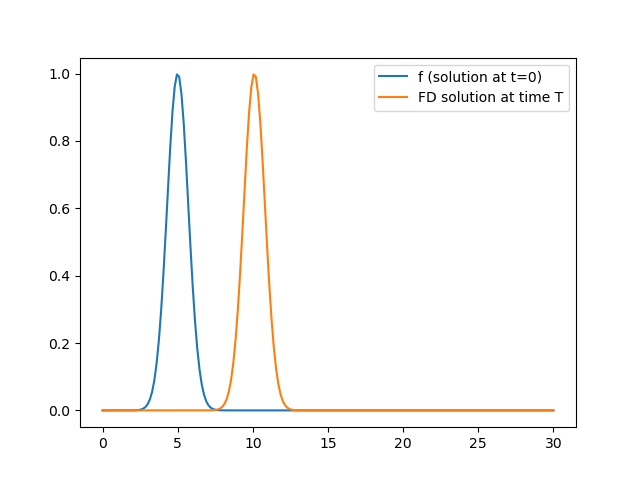

In [5]:
plt.figure()
plt.plot(x, f)
plt.plot(x, u)
plt.legend(["f (solution at t=0)", "FD solution at time T"])
plt.show()

### Note
This is an "upwind scheme" -- for $a>0$ information comes from the left, so it makes sense to update with the backward finite difference
$$
\frac{\partial}{\partial x} u^n_k \approx \frac{u^{k}_{n} - u^k_{n-1}}{\Delta x}.
$$

**Exercise:** Try the forward finite difference 
$$
\frac{\partial}{\partial x} u^n_k \approx \frac{u^{k}_{n+1} - u^k_{n}}{\Delta x},
$$
and/or $a<0$.

## Observations
- For $a\cdot \Delta t/\Delta x > 1$, there is instability.
- For $a\cdot \Delta t/\Delta x < 1$, there is numerical diffusion (the smaller, the worse).
- For $a\cdot \Delta t/\Delta x = 1$, we get exact results (information transport along characteristic!).
- However, there are important applications where $a$ is not a constant!
- $a$ may depend on $t, x$, and even on $u$.

## Better schemes
- Higher Order Finite Differences: Lax-Wendroff scheme
- Predictor-Corrector: MacCormack (equivalent to Lax-Wendroff for linear equations)

# Inviscid Burgers equation
$$ u_t + u u_x = 0.$$
- Same type of non-linearity as in Navier-Stokes (fluid flow)
- Note that we can re-write this in conservative form (continuity equation for $j(u) = u^2/2$):
    $$\frac{\partial}{\partial t} u + \frac{\partial}{\partial x} \frac{u^2}{2} = 0. $$

## Solution with the method of characteristics
- In $u u_x$, the factor $u$ can be regarded as a transport velocity
- Matter in regions of large $u$ move faster than regions of small $u$
- Formation of shocks under depending on initial conditions
- Classical solution breaks down, discontinuity at shock
- However, so-called weak solutions exist

## Numerical solution

In [42]:
N = 2000
L = 30.0
dx = L/N
dt = dx
x = np.linspace(0, L, N+1)

#u0 = np.exp(-(x-5)**2)
u0 = np.piecewise(x, [x < 4, (4 <= x)&(x < 5), (5 <= x)&(x < 6), x >= 6], [0, lambda x:x-4, lambda x:6-x, 0])
#u0 = np.piecewise(x, [x < 5, (5 <= x)&(x < 6), x >= 6], [1, lambda x:6-x, 0])
u = u0.copy()
un = u0.copy()
sig = dt/dx

t = 0.0
T = 15.0
while t < T:
    t += dt
    u[1:-1] -= 0.5*sig*( u[1:-1]**2 - u[0:-2]**2 )  # conservative
    un[1:-1] -= sig*un[1:-1]*( un[1:-1] - un[0:-2] )    # non-conservative

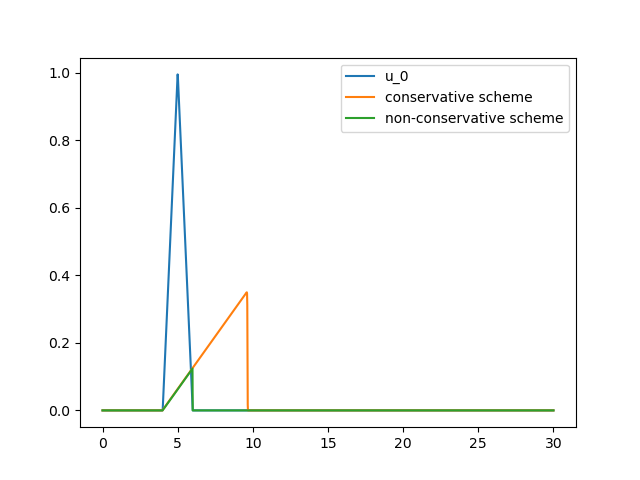

In [43]:
plt.figure()
plt.plot(x, u0)
plt.plot(x, u)
plt.plot(x, un)
plt.legend(["u_0", "conservative scheme", "non-conservative scheme"])
plt.show()

## Mass conservation

For periodic boundary conditions (or $u(t, x)\to 0$ for $x\to\pm\infty$ on an infinite domain $\Omega$), the  "total mass"
$$ M = \int_\Omega u(t, x) \, dx$$
is conserved, i.e. constant in time $t$.

Proof for periodic boundary conditions $u(t, 0) = u(t, L)$:
\begin{align*}
\frac{dM}{dt} &= \frac{d}{dt} \int_0^L u(t, x) \, dx = \int_0^L u_t(t, x) \, dx\\
    &= -\int_0^L \frac{\partial}{\partial x} \frac{u^2}{2} \, dx = -\frac{u(t,L)^2}{2} + \frac{u(t,0)^2}{2}\\
    &= 0.
\end{align*}

## Numerical test

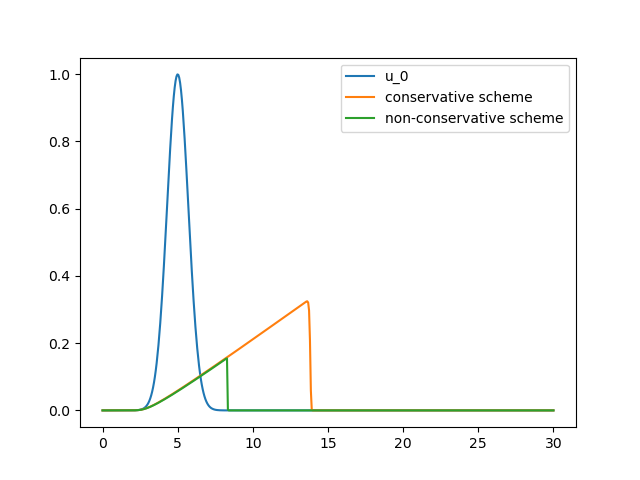

Total mass at t = 0: 		1.772453850904529
Total mass at t = 30.0:
Non-conservative scheme: 	0.4148638020878957
Conservative scheme: 		1.7724538509045287


In [65]:
N = 500
L = 30.0
dx = L/N
dt = 0.03*dx
x = np.linspace(0, L, N+1)

u0 = np.exp(-(x-5)**2)
#u0 = np.piecewise(x, [x < 4, (4 <= x)&(x < 5), (5 <= x)&(x < 6), x >= 6], [0, lambda x:x-4, lambda x:6-x, 0])
#u0 = np.piecewise(x, [x < 5, (5 <= x)&(x < 6), x >= 6], [1, lambda x:6-x, 0])
#u0 = np.piecewise(x, [x < 5, x >= 5], [lambda x:x/5, 1])
u = u0.copy()
un = u0.copy()
sig = dt/dx

t = 0.0
T = 30.
while t < T:
    t += dt
    u[1:] -= 0.5*sig*( u[1:]**2 - u[0:-1]**2 )  # conservative
    un[1:] -= sig*un[1:]*( un[1:] - un[0:-1] )    # non-conservative
    # periodic boundary
    u[0] -= 0.5*sig*( u[0]**2 - u[-1]**2 )
    # Dirichlet boundary
    #u[0] = 0
    #u[-1] = 1

plt.figure()
plt.plot(x, u0)
plt.plot(x, u)
plt.plot(x, un)
plt.legend(["u_0", "conservative scheme", "non-conservative scheme"])
plt.show()

print(f"Total mass at t = 0: \t\t{u0.sum()*dx}")
print(f"""Total mass at t = {T}:
Non-conservative scheme: \t{un.sum()*dx}
Conservative scheme: \t\t{u.sum()*dx}""")

## Lesson
If there is a conservation law, make use of it!